# Logistic Regression-(Social_Network_Ads.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score,precision_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv(r'C:\Users\Satish\Desktop\Social_Network_Ads.csv')

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
df.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [5]:
df.shape

(400, 3)

In [6]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


<AxesSubplot:xlabel='Age', ylabel='Density'>

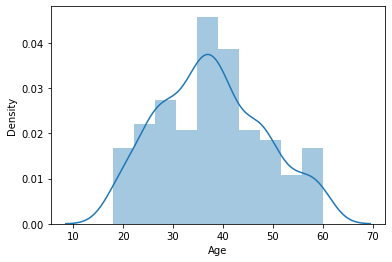

In [7]:
##Visualization of Numerical Columns
sns.distplot(df['Age'])

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

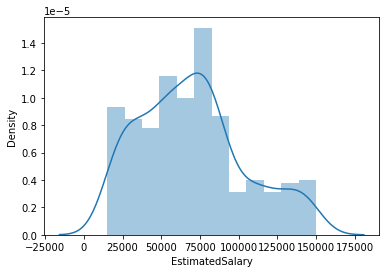

In [8]:
sns.distplot(df['EstimatedSalary'])

In [9]:
# Five Number Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


In [10]:
#Missing Values
df.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [11]:
##Exploratory Data Analysis(EDA)

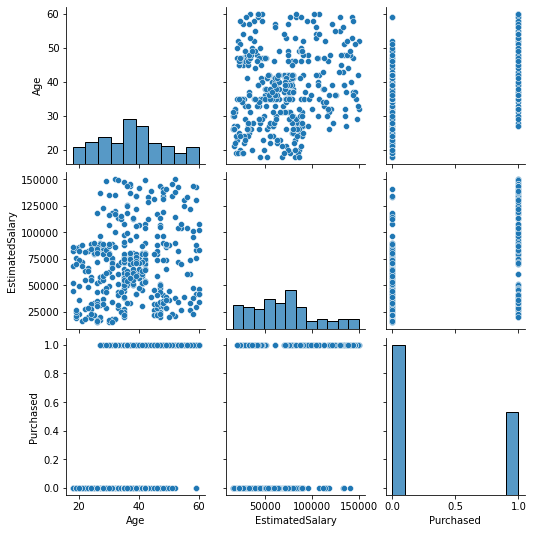

In [12]:
sns.pairplot(df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

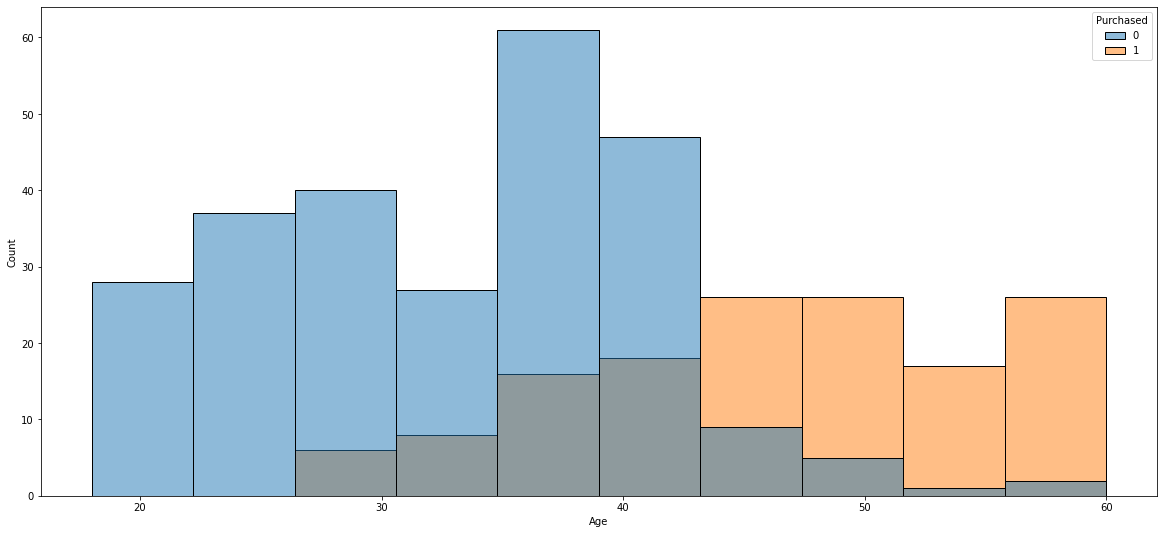

In [13]:
plt.figure(figsize=[20,9])
sns.histplot(x='Age',hue='Purchased',data=df)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

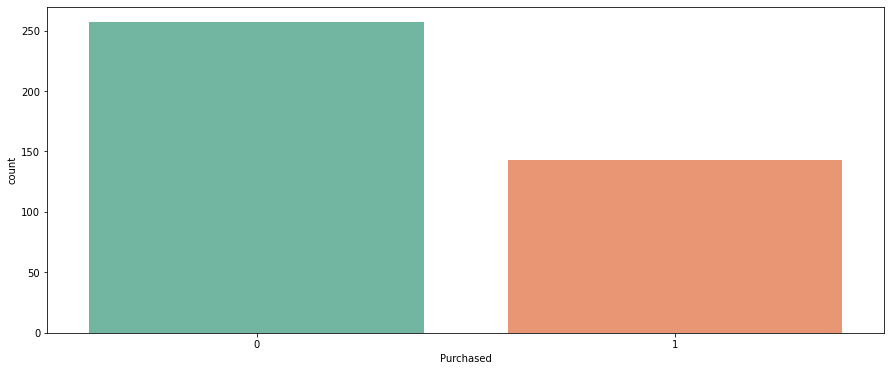

In [14]:
plt.figure(figsize=[15,6])
sns.countplot(x='Purchased',data=df,palette='Set2')

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

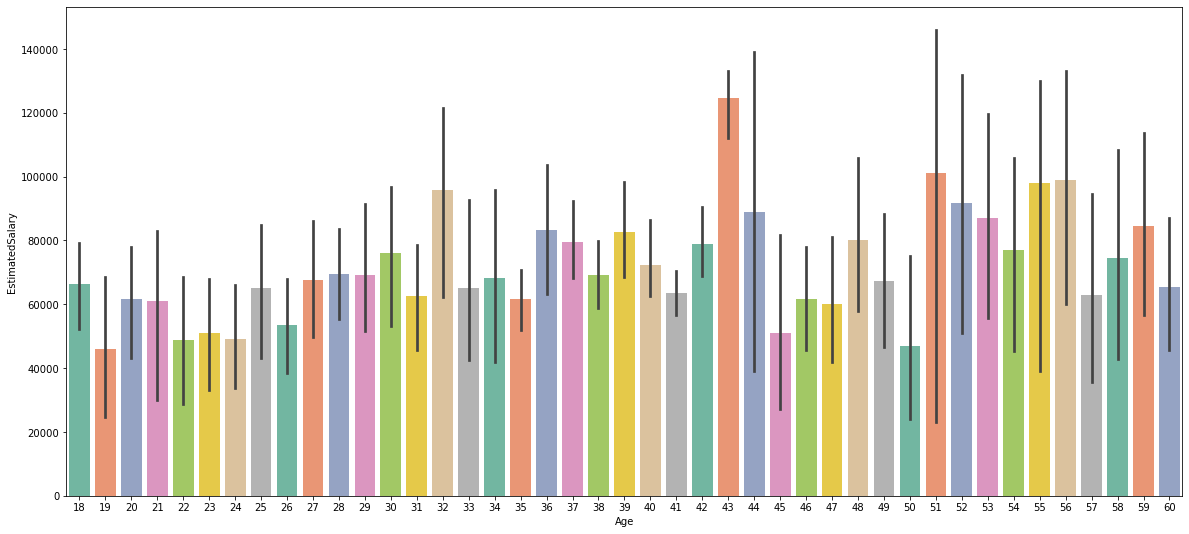

In [15]:
plt.figure(figsize=[20,9])
sns.barplot(x='Age',y='EstimatedSalary',data=df,palette='Set2')

In [16]:
df.sample()

,Age,EstimatedSalary,Purchased
367,46,88000,1


In [17]:
x = df.iloc[:,0:2]

In [18]:
y=df['Purchased']

In [19]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [20]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [21]:
##Split the Data
x = np.asarray(df[['Age','EstimatedSalary']])
y = np.asarray(df['Purchased'])

In [22]:
## Normalize the Dataset
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059]])

In [23]:
##Train/Test the data
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=40)

In [24]:
LR = LogisticRegression(solver='liblinear').fit(train_x,train_y)

In [25]:
pred = LR.predict(test_x)
pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [26]:
pred_prob = LR.predict_proba(test_x)
pred_prob

array([[0.89777273, 0.10222727],
       [0.50533102, 0.49466898],
       [0.53652724, 0.46347276],
       [0.97694661, 0.02305339],
       [0.71510381, 0.28489619],
       [0.5737222 , 0.4262778 ],
       [0.32137057, 0.67862943],
       [0.61141436, 0.38858564],
       [0.01641663, 0.98358337],
       [0.16020359, 0.83979641],
       [0.64049564, 0.35950436],
       [0.79275103, 0.20724897],
       [0.81164204, 0.18835796],
       [0.12600193, 0.87399807],
       [0.83283811, 0.16716189],
       [0.66305124, 0.33694876],
       [0.98801073, 0.01198927],
       [0.71405795, 0.28594205],
       [0.85732482, 0.14267518],
       [0.62731473, 0.37268527],
       [0.58257289, 0.41742711],
       [0.99484861, 0.00515139],
       [0.08985039, 0.91014961],
       [0.88682573, 0.11317427],
       [0.98806666, 0.01193334],
       [0.98731394, 0.01268606],
       [0.49103294, 0.50896706],
       [0.99229848, 0.00770152],
       [0.57497582, 0.42502418],
       [0.35878944, 0.64121056],
       [0.

In [27]:
#Evaluation
LR.score(test_x,test_y)

0.8375

In [28]:
##Classification Report
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        56
           1       0.87      0.54      0.67        24

    accuracy                           0.84        80
   macro avg       0.85      0.75      0.78        80
weighted avg       0.84      0.84      0.82        80



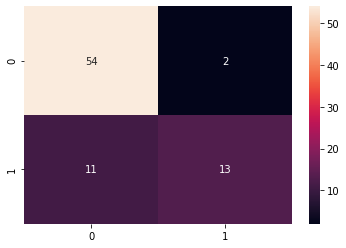

In [29]:
cm = confusion_matrix(test_y,pred)
sns.heatmap(cm,annot=True)
plt.show()